Notebook này tổng hợp kết quả nhận diện biển báo giao thông của 4 model VGG16, InceptionV3, ResNet50 và MobileNet.
Thử nghiệm nhận diện trên ảnh tĩnh.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/dataset-cv

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

labels_f = pd.read_csv('label.csv', delimiter=';', header=None)

categories = np.array(labels_f.iloc[:, 0])
description = np.array(labels_f.iloc[:, 1])

save = False
stream = True
conf = 0.2
target_size = (128, 128)
bbox_color = [(255, 0, 0), (0, 128, 0), (0, 0, 255), (128, 0, 128), (255, 165, 0), (165, 42, 42)]
bbox_color_names = ['Đỏ', 'Xanh lá cây', 'Xanh da trời', 'Tím', 'Cam', 'Nâu']

# Load model yolov8 custom
yolo = YOLO('yolov8-custom.pt')
# Load model vgg16
vgg16 = keras.models.load_model('/content/drive/MyDrive/dataset-cv/vgg16_model.h5')
# Load model resnet
resnet50 = keras.models.load_model('/content/drive/MyDrive/dataset-cv/Resnet/resnet50.h5')
# Load model mobilenet
mobilenet = keras.models.load_model('/content/drive/MyDrive/dataset-cv/MobileNet/mobilenet_200.h5')
# Load model inceptionV3
inceptionV3 = keras.models.load_model('/content/drive/MyDrive/dataset-cv/interceptionV3/InterceptionV3.h5')

In [ ]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img_test_path = 'w224-w207b.jpg'


0: 256x320 2 trafficsigns, 287.5ms
1/1 [==============================] - 1s 797ms/step
Bbox màu Đỏ; Nhãn: W.245a - Đi chậm
1/1 [==============================] - 0s 330ms/step
Bbox màu Xanh lá cây; Nhãn: W.207c - Giao nhau với đường không ưu tiên
Speed: 12.7ms preprocess, 287.5ms inference, 2140.3ms postprocess per image at shape (1, 3, 256, 320)


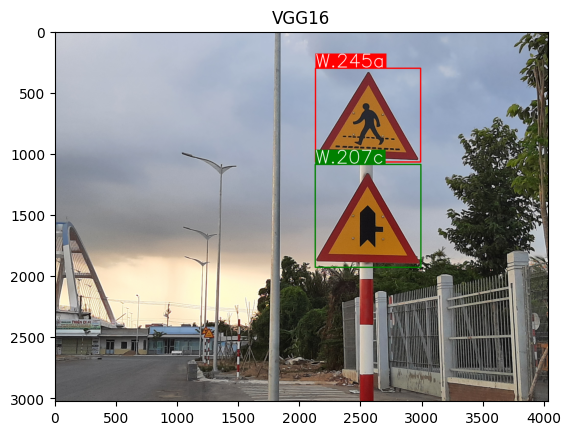

In [ ]:
img = cv2.imread(img_test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img_batch)
    predict = vgg16.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('VGG16')
plt.imshow(img)
plt.show()


0: 256x320 2 trafficsigns, 470.6ms
1/1 [==============================] - 3s 3s/step
Bbox màu Đỏ; Nhãn: W.201a - Chỗ ngoặc nguy hiểm vòng bên trái
1/1 [==============================] - 0s 286ms/step
Bbox màu Xanh lá cây; Nhãn: W.201a - Chỗ ngoặc nguy hiểm vòng bên trái
Speed: 1.6ms preprocess, 470.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)


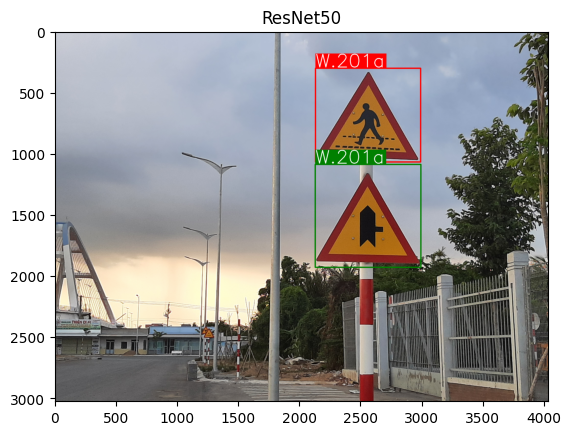

In [ ]:
img = cv2.imread(img_test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.resnet50.preprocess_input(img_batch)
    predict = resnet50.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('ResNet50')
plt.imshow(img)
plt.show()


0: 256x320 2 trafficsigns, 254.4ms
1/1 [==============================] - 1s 993ms/step
Bbox màu Đỏ; Nhãn: W.224 - Đường người đi bộ cắt ngang
1/1 [==============================] - 0s 54ms/step
Bbox màu Xanh lá cây; Nhãn: W.207c - Giao nhau với đường không ưu tiên
Speed: 1.7ms preprocess, 254.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)


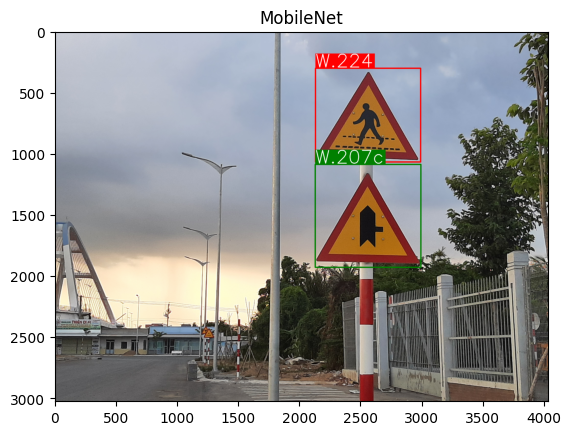

In [ ]:
img = cv2.imread(img_test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.mobilenet.preprocess_input(img_batch)
    predict = mobilenet.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('MobileNet')
plt.imshow(img)
plt.show()


0: 256x320 2 trafficsigns, 160.7ms
1/1 [==============================] - 0s 54ms/step
Bbox màu Đỏ; Nhãn: W.224 - Đường người đi bộ cắt ngang
1/1 [==============================] - 0s 63ms/step
Bbox màu Xanh lá cây; Nhãn: W.207b - Giao nhau với đường không ưu tiên
Speed: 2.2ms preprocess, 160.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 320)


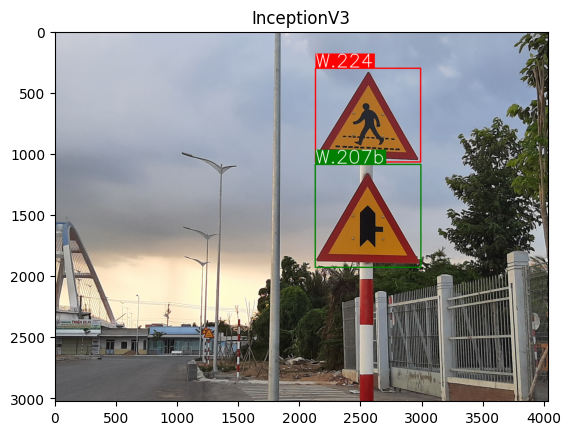

In [ ]:
img = cv2.imread(img_test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.inception_v3.preprocess_input(img_batch)
    predict = inceptionV3.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('InceptionV3')
plt.imshow(img)
plt.show()


0: 256x320 1 trafficsign, 186.6ms
1/1 [==============================] - 0s 312ms/step
Bbox màu Đỏ; Nhãn: P.127 - Tốc độ tối đa cho phép
Speed: 1.5ms preprocess, 186.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 320)


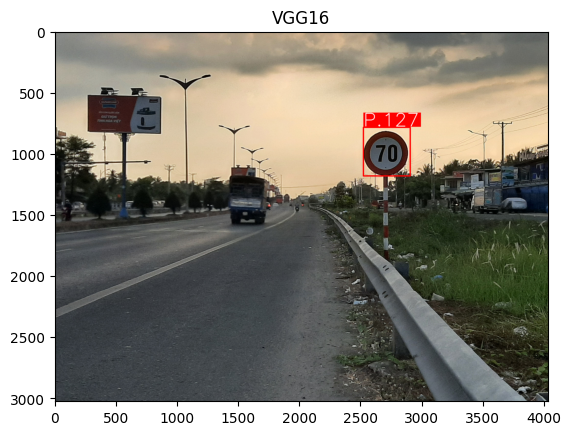

In [ ]:
img = cv2.imread('p127.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img_batch)
    predict = vgg16.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('VGG16')
plt.imshow(img)
plt.show()


0: 256x320 1 trafficsign, 115.5ms
1/1 [==============================] - 0s 87ms/step
Bbox màu Đỏ; Nhãn: P.117 - Hạn chế chiều cao
Speed: 2.4ms preprocess, 115.5ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 320)


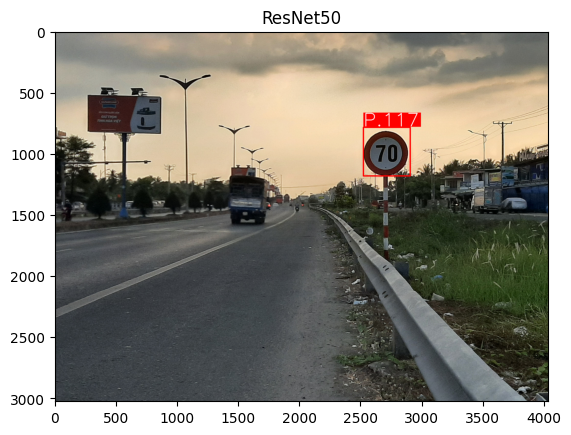

In [ ]:
img = cv2.imread('p127.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.resnet50.preprocess_input(img_batch)
    predict = resnet50.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('ResNet50')
plt.imshow(img)
plt.show()


0: 256x320 1 trafficsign, 128.9ms
1/1 [==============================] - 0s 46ms/step
Bbox màu Đỏ; Nhãn: P.127 - Tốc độ tối đa cho phép
Speed: 4.1ms preprocess, 128.9ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 320)


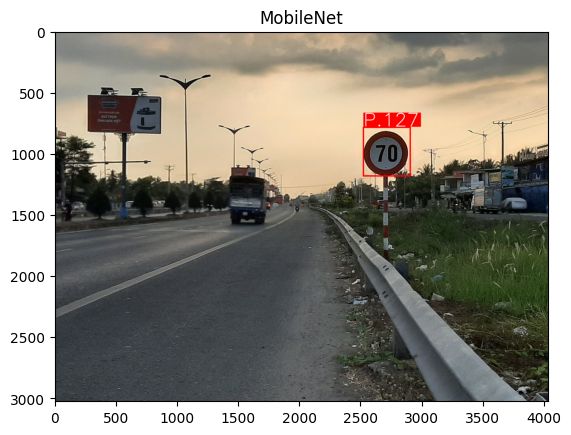

In [ ]:
img = cv2.imread('p127.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.mobilenet.preprocess_input(img_batch)
    predict = mobilenet.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('MobileNet')
plt.imshow(img)
plt.show()


0: 256x320 1 trafficsign, 190.9ms
1/1 [==============================] - 0s 85ms/step
Bbox màu Đỏ; Nhãn: P.127 - Tốc độ tối đa cho phép
Speed: 1.7ms preprocess, 190.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)


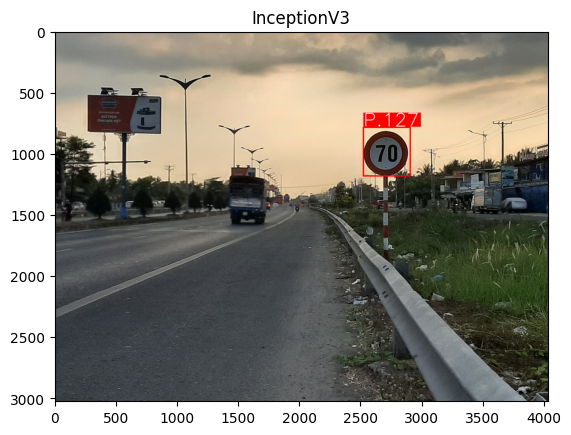

In [ ]:
img = cv2.imread('p127.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect với YOLOv8
res = yolo(img, save=False, stream=True, conf=0.1, imgsz=320)

# Ve cac bounding box va phan loai bien bao
for r in res:
  if r.boxes.xyxy.shape[0] < 1:
    continue
  for i, box in enumerate(r.boxes.xyxy):
    x1, y1, x2, y2 = np.array(box)

    roi = img[int(y1):int(y2), int(x1):int(x2)]
    roi = cv2.resize(roi, target_size)
    img_batch = np.expand_dims(roi, axis=0)
    img_preprocessed = tf.keras.applications.inception_v3.preprocess_input(img_batch)
    predict = inceptionV3.predict(img_preprocessed)
    labels_idx = np.argmax(predict, axis=1)
    label = categories[labels_idx[0]]
    print(f'Bbox màu {bbox_color_names[i]}; Nhãn: {label} - {description[labels_idx[0]]}')

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), bbox_color[i], 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font, 5, 5)

    bg_text_x1 = int(x1)
    bg_text_y1 = int(y1) - text_size[1] - 12
    bg_text_x2 = int(x1) + text_size[0] + 10
    bg_text_y2 = int(y1) - 5

    cv2.rectangle(img, (bg_text_x1, bg_text_y1), (bg_text_x2, bg_text_y2), bbox_color[i], -1)
    cv2.putText(img, label, (int(x1), int(y1) - 10), font, 5, (255, 255, 255), 5, cv2.LINE_AA)

plt.title('InceptionV3')
plt.imshow(img)
plt.show()